In [1]:
#
# plot olr distribution using ZL6 dataset
# see https://easy.gems.dkrz.de/Processing/healpix/index.html
%config InlineBackend.print_figure_kwargs = {"dpi": 72}
import intake
# for online
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
# for nowake
#cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["JAPAN"]
zd = cat.nicam_gl11(time="PT3H", zoom=6).to_dask()
zd

/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 19GB
Dimensions:    (time: 2920, cell: 49152, bnds: 2)
Coordinates:
    lev        float64 8B ...
  * time       (time) datetime64[ns] 23kB 2020-03-01T01:30:00 ... 2021-02-28T...
Dimensions without coordinates: cell, bnds
Data variables: (12/30)
    clivi      (time, cell) float32 574MB ...
    clt        (time, cell) float64 1GB ...
    clwvi      (time, cell) float32 574MB ...
    healpix    int32 4B ...
    hflsd      (time, cell) float32 574MB ...
    hfssd      (time, cell) float32 574MB ...
    ...         ...
    rsutcs     (time, cell) float32 574MB ...
    tas        (time, cell) float64 1GB ...
    time_bnds  (time, bnds) datetime64[ns] 47kB ...
    ts         (time, cell) float64 1GB ...
    uas        (time, cell) float64 1GB ...
    vas        (time, cell) float64 1GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    comment:      Be careful that definition of time coordinate depends on th...
    history:      Fri Mar 07 10:05:22 2025: cdo mergetime ./z06/2020/03/3hour...
    title:        NICAM data output

In [2]:
nt = zd.rlut.shape[0]
olr = zd.rlut.isel(time=nt-1) # Outgoing Longwave Radiation
olr.shape
#olr.shape: 12 * 4^6 = 49152 (zoom_level = 6)

(49152,)

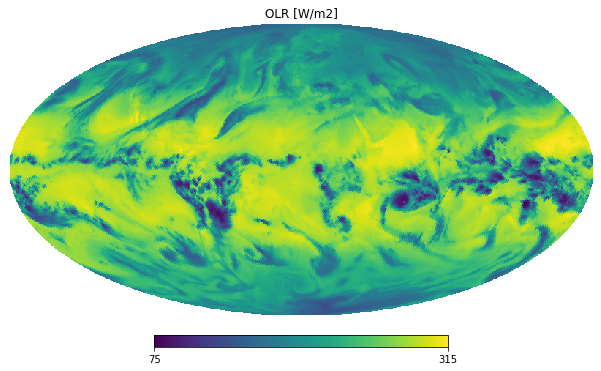

In [3]:
import healpy as hp
import matplotlib.pyplot as plt 

flg_nested = zd.healpix.healpix_order == "nested" # data order
hp.mollview(olr, flip="geo", nest=flg_nested, title="OLR [W/m2]", min=75., max=315.)
